In [ ]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots() 

Cuando se llama a la función **plt.subplots()** sin llamar a algun input, crea dos objetos distintos: un objeto figura (fig) y un objeto de eje (ax). El objeto **fig** es un contenedor que **contiene todo lo que ves en la página**, mientras que el objeto **ax** es la parte de la página que contiene la data (el lienzo sobre el cual dibujaríamos nuestra data para visualizarla).

**Entonces, como ax es el lienzo, vamos a "pintar" sobre este: le vamos a añadir los gráficos acá. Este plot se termina de ver con la linea plt.show()**

In [ ]:
ax.plot(*x variable*, *y variable*, marker="o") #el argumento marker te permite indicar que queres
    #indicar marcadores al plot. Siguiente vamos a ver varios tipos:
plt.show()

#SI QUIERO PLOTEAR ALGO CON EL ÍNDICE DEL DF, LO QUE HAGO ES LO SIGUIENTE
ax.plot(df.index, *y variable*, marker="o")

ax.plot(*x variable*, *y variable*, marker="o")
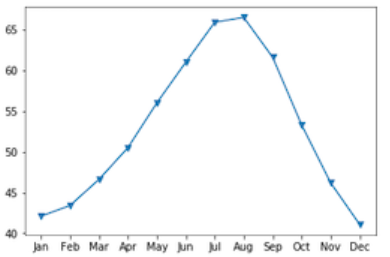

ax.plot(*x variable*, *y variable*, marker="v")
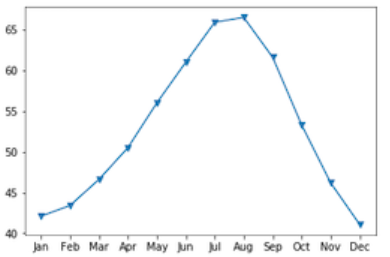

Para ver la documentación completa, ir a https://matplotlib.org/api/markers_api.html

In [ ]:
ax.plot(x variable, y variable, marker="v", linestyle="--") #lo que se hace con el argumento
    #linestyle es cambiar el tipo de linea del gráfico
plt.show()

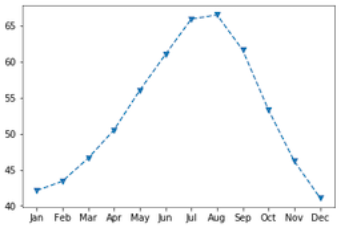

In [ ]:
ax.plot(x variable, y variable, marker="v", linestyle="None") #Acá le saco la linea 
plt.show()

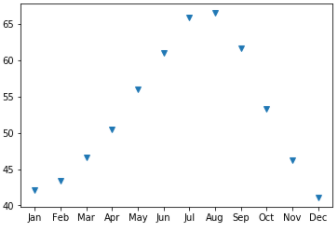

In [ ]:
ax.plot(x variable, y variable, marker="v", linestyle="None", color="color")
ax.set_xlabel('Etiqueta X')
ax.set_ylabel('Etiqueta Y')
ax.set_title('Titulo')
plt.show()

**Multiples gráficos**

In [ ]:
#¿Qué pasa si queremos añadir varios gráficos, pero ponerlos todos en un gráfico se hace mucho
#quilombo?
    #USAMOS SMALL MULTIPLES (subplots)

fig, ax= plt.subplots(2, 1) #2 filas y 1 columna por ejemplo
ax[0].plot(x variable, y variable,........) #cargamos el primer elemento con índice 0. acá si 
    #quiero puedo poner muchos gráficos, cargandolos en ax[0]
ax[1].plot(x variable, y variable,........) #segundo elemento
ax[0].set_ylabel('Etiqueta Y elemento 1')
ax[1].set_ylabel('Etiqueta Y elemento 2')
ax[1].set_xlabel('Etiqueta X')
plt.show()

Si por ejemplo agregué 3 gráficos a cada elemento, esto se vería mas o menos así
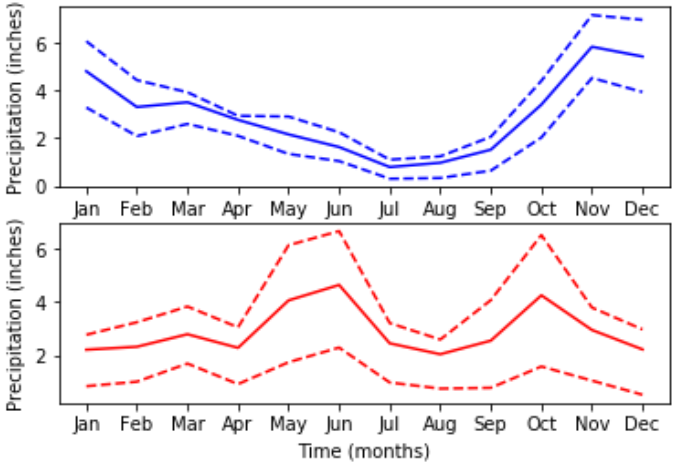

Algo de lo que tenemos que hacernos cargo es de homologar los valores considerados en el eje Y en ambos gráficos. Para esto, tengo que hacer una modificación en el código inicial:

In [ ]:
fig, ax= plt.subplots(2,1, sharey=True)

Crear un gráfico con dos ejes Y

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.index, df['variable y'], color= 'blue')
ax.set_xlabel('Etiqueta X')
ax.set_ylabel('Etiqueta Y', color= 'blue')
ax2 = ax.twinx()
ax2.plot(df.index, df['segunda variable y'], color='red')
ax2.set_ylabel('Etiqueta Y', color= 'red')
plt.show()

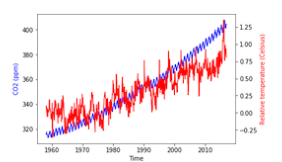

### Función para plotear series de tiempo

In [ ]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

**Añadir anotaciones a las series de tiempo**

Por ejemplo, tomemos a consideración la data que usamos en visualizaciones previas: 
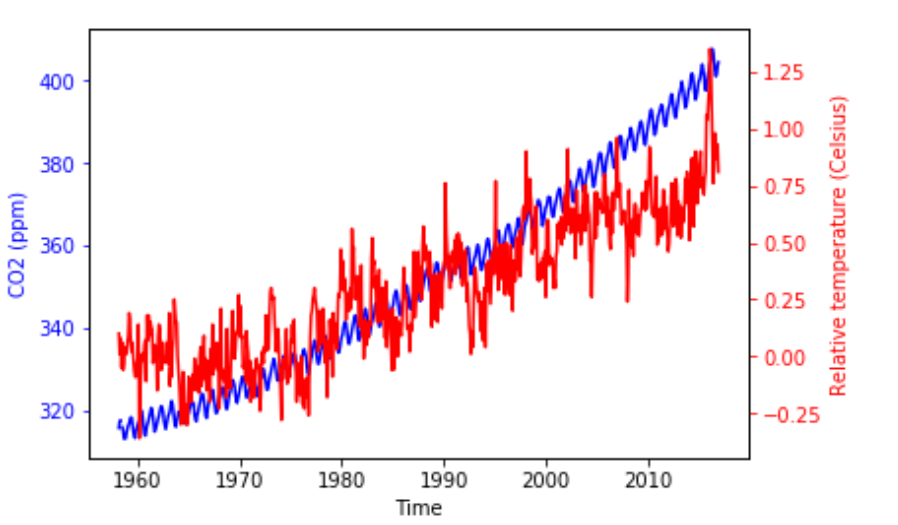

Quizas queremos añadir énfasis a un punto en particular de la data. Una manera de hacerlo es anotarlo: añadir una flecha que apunte hacia este, y un texto. Entonces, vamos a poner un ejemplo concreto:

In [ ]:
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change['co2'],'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index,                 
                climate_change['relative_temp'],
                'red', 'Time', 'Relative temperature (Celsius)')
ax2.annotate(">1 degree",  xy=[pd.TimeStamp("2015-10-06"), 1])
plt.show()


Añadiendo el método 'annotate' al segundo eje, ubico el texto '>1 degree' en la temperatura correspondiente al 2015-10-06 (la forma en la que situo este punto que quiero hacer foco es mediante el argumento **xy**:
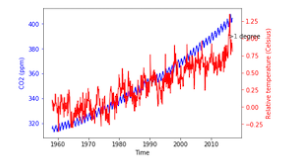

Sin embargo, está muy en el medio ese texto. Por eso, vamos a moverlo de lugar. Para esto, el método annotate tiene un argumento que te permite ubicar el texto en una coordenada de los ejes. Este argumento se llama **xytext**.

In [ ]:
ax2.annotate(">1 degree",  
             xy=[pd.TimeStamp("2015-10-06"), 1],
             xytext=(pd.Timestamp('2008-10-06'), -0.2))

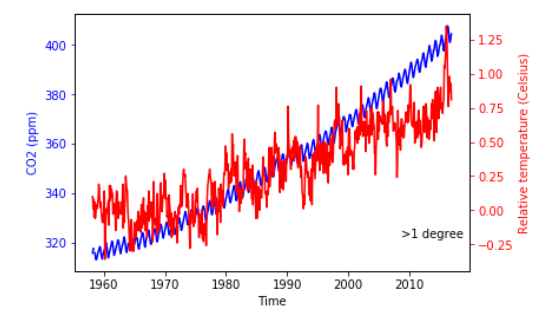

El problema ahora es que no tenemos forma de saber a qué punto se está haciendo referencia. Por eso vamos a crear una flecha que conecte el texto a la data. Para esto, el argumento clave se llama **arrowprops**, que es la abreviatura de arrow properties. Este argumento toma un diccionario donde se especifican las propiedades que queremos que tenga la flecha.

In [ ]:
ax2.annotate(">1 degree",  
             xy=[pd.TimeStamp("2015-10-06"), 1],
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops= {})

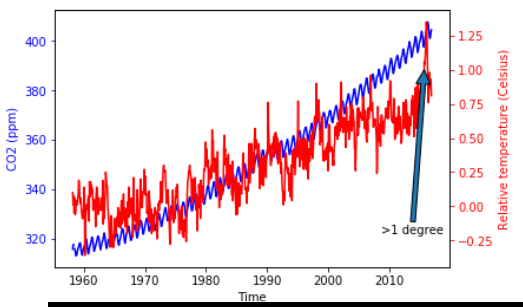

Si lo dejamos vacío, la flecha va a tener las propiedades por default, pero vamos a cambiarla un poco

In [ ]:
ax2.annotate(">1 degree",  
             xy=[pd.TimeStamp("2015-10-06"), 1],
             xytext=(pd.Timestamp('2008-10-06'), -0.2), 
             arrowprops= {'arrowstyle': '->', 'color': 'gray'})

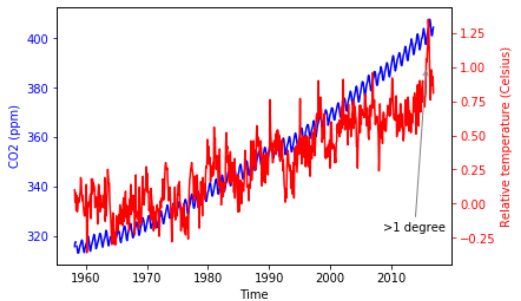

Para ver mas opciones, ir a la documentación: https://matplotlib.org/users/annotations.html


**Gráficos de Barras**

A diferencia de lo que vimos previamente, ahora vamos a determinar variables categóricas

In [ ]:
fig, ax= plt.subplots()
ax.bar('var categorica (eje x)', 'var que la cuantifica')
ax.set_xticklabels('var categorica (eje x)', rotation=90)
ax.set_ylabel('etiqueta y')
plt.show()

Al igual que el gráfico de lineas, si cargo varios gráficos a ax voy a poder visualizarlos a todos dentro de los mismos ejes. Por defecto me los va a poner como barras apiladas. A esto tengo que sumarle las etiquetas, y al segundo gráfico tengo que ponerle el argumento 'bottom', indicandole cuál será la variable que estará por debajo.

In [ ]:
fig, ax= plt.subplots()
ax.bar('var x 1', 'var y', label='barras1')
ax.bar('var x 2', 'var y', bottom= 'var x 1', label='barras2')

ax.legend()
ax.set_xticklabels('var categorica (eje x)', rotation=90)
ax.set_ylabel('etiqueta y')
plt.show()

**Histogramas: comparación cuantitativa**

Los gráficos de barras nos muestran el valor de una variable en diferentes condiciones. Los histogramas nos muestran la distribución general de los valores de una variable. Por ejemplo, tomemos en cuenta un bar chart de dos variables.

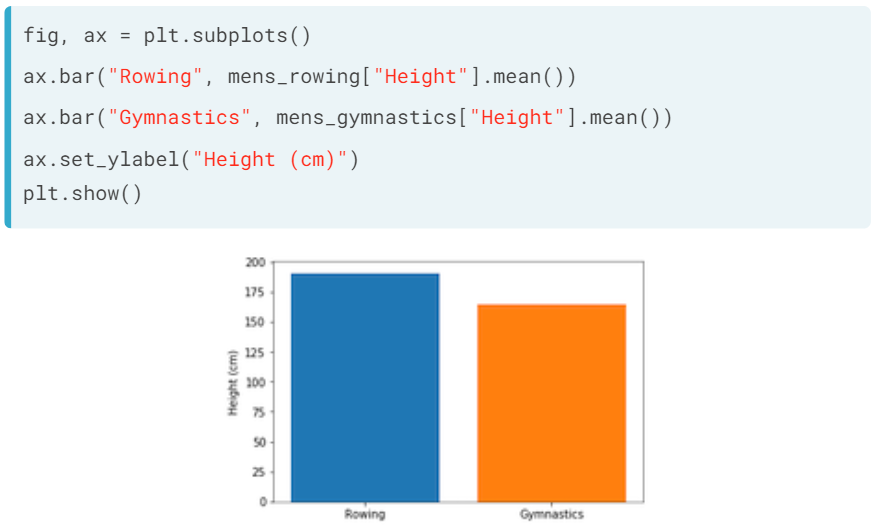

El histograma, por otro lado, muestra la **distribución** de cada uno de las variables:

In [ ]:
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label= 'Rowing', bins=10) 
ax.hist(mens_gymnastics['Height'], label= 'Gymnastics', bins=10) #para seguir con el ejemplo
ax.set_ylabel('etiqueta y')
ax.set_xlabel('etiqueta x')
ax.legends()
plt.show()

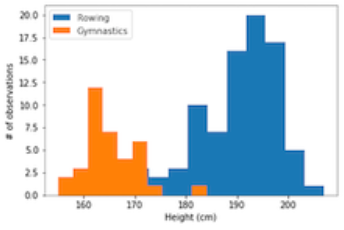

Acá el problema es que no se ve lo que pasa por detras del gráfico de gimnastas. Para esto, voy a  cambiar el tipo de histograma

In [ ]:
fig, ax = plt.subplots()
ax.hist(mens_rowing['Height'], label= 'Rowing', bins=10, histtype= 'step') 
ax.hist(mens_gymnastics['Height'], label= 'Gymnastics', bins=10, histtype= 'step') 

ax.set_ylabel('etiqueta y')
ax.set_xlabel('etiqueta x')
ax.legends()
plt.show()

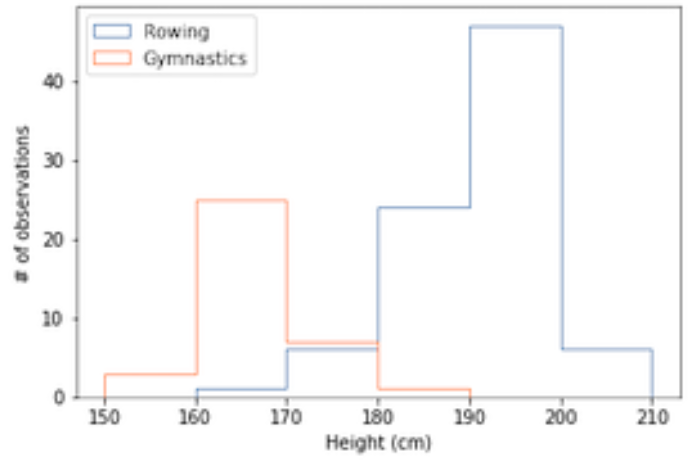

**Statistical plotting**

Son una serie de metodos para usar visualizaciones para hacer comparaciones.

Uso de barras de errores en plots

In [2]:
fig, ax= plt.subplots()

ax.bar('var x1', 
      'y'.mean(),
      yerr='y'.std())

ax.bar('var x1', 
      'y'.mean(),
      yerr='y'.std())

ax.set_ylabel('Etiqueta y')
plt.show()

#acá le añadimos la barra de error como argumento al gráfico de barras. Acá marcamos la media
#y añadimos el desvío estándar como una linea vertical. La altura de la barra va a ser igual al
#valor de la media.

NameError: name 'plt' is not defined

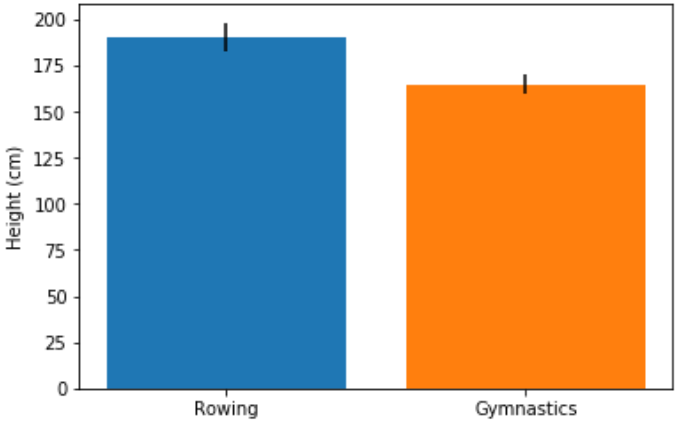


In [ ]:
#Boxplot
fig, ax= plt.subplots()
ax.boxplot(['var1 a analizar', 'var2 a analizar'])
ax.set_xticklabels(['etiqueta x1', 'etiqueta x2'])
ax.set_ylabel('etiqueta y')

plt.show()

**Comparaciones Cuantitativas: Scatter Plot**

In [ ]:
fig, ax= plt.subplots()
ax.scatter('x var', 'y var')
ax.set_xlabel('etiqueta x')
ax.set_ylabel('etiqueta y')
plt.show()

Puedo añadir una tercer variable para personalizar el color del plot. En base a esta variable, el plot va a cambiar de color (CREO que tiene que ser continua). Se agrega utilizando el argumento "c" a la linea de código.

In [ ]:
fig, ax= plt.subplots()
ax.scatter('x var', 'y var', c='tercer variable')
ax.set_xlabel('etiqueta x')
ax.set_ylabel('etiqueta y')
plt.show()

Podemos tener algo así:

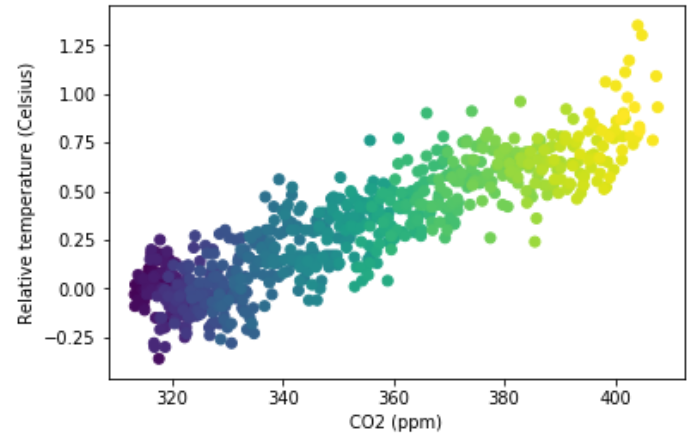

**Preparar visualización para compartir con otros**

In [ ]:
plt.style.use('ESTILO') #Puedo elegir muchos estilos. Esto se pone antes de establecer fig y ax
        #ESTE ESTILO SE VA A APLICAR A TODOS LOS GRÁFICOS QUE HAGAS DE ALLÍ EN MAS, HASTA QUE LO
        #VUELVAS A CAMBIAR.
        #Hay muchos estilos:
            #bmh
            #seaborn-colorblind
            #ggplot
            #tableau-colorblind10
            #grayscale
            #y mas

Para ver todos los estilos, ir a https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

**Compartir tu visualización con otros**

Si al final del código que arma un gráfico, en lugar de plt.show() pongo la siguiente linea, me va a guardar la imagen por fuera de jupyter y no me la va a mostrar acá

In [ ]:
fig.savefig('nombreimagen.png')

Acá, al igual que en la consola, **puedo poner el codigo 'ls' y me va a mostrar los archivos que tengo en el directorio**. Además de .png, la puedo guardar **.jpg** o **.svg**. Si quiero modificar la calidad de la imágen, porque no quiero que me ocupe tanto espacio, puedo agregarle al método este el argumento 'quality' acompañado de un número de 0 a 100. **Si quiero ponerle mas de 90 ya va a perder efectividad**.

In [ ]:
fig.savefig('nombreimagen.jpg', quality= *numero*)

Otro argumento que se le puede agregar es **'dpi'** (dots per inch). Cuanto mas alto sea, mas densa la imagen a renderizar (300 es una densidad ya elevada).

In [ ]:
fig.savefig('nombreimagen.jpg', dpi=300)

También puedo personalizar el tamaño de la imagen.

In [ ]:
fig.set_size_inches([*ancho*, *largo*])

**Automatizando Figuras desde la data**

Supongamos que queremos realizar un plot de una variable categórica y no sabemos cuántas categorías hay.

In [ ]:
fig, ax= plt.subplots()

categories= df['columna'].unique()

for i in categories:
    category_df= df[df['columna'] == i]
    ax.bar(i, *var x*.mean(),
          yerr= *var x*.std())
ax.set_ylabel('etiqueta y')
ax.set_xticklabels(categories, rotation=90)
plt.show

La imagen se vería similar a esto: 

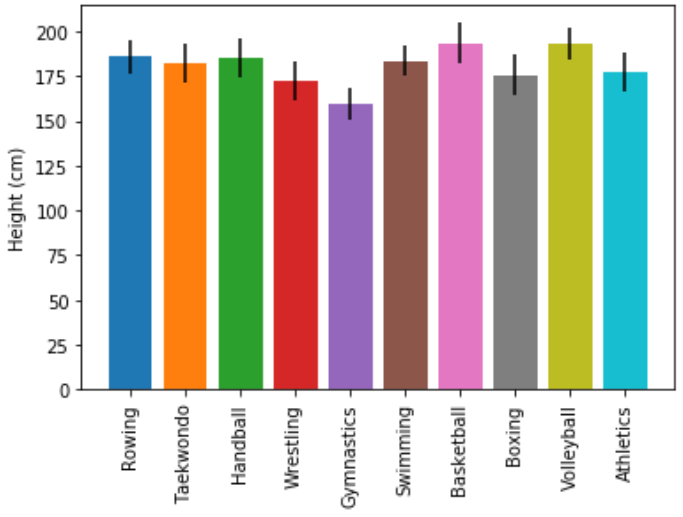

Ver más gráficos con sus respectivos códigos:
https://matplotlib.org/gallery.html

Para hacer animaciones con matplotlib:
https://matplotlib.org/api/animation_api.html